Ce notebook nécessite de disposer du logiciel [graphviz](https://graphviz.org/download/) ainsi que du module graphviz pour python (`pip install graphviz`).

### Installation de graphviz sous Windows (méthode 1)

- On se rendra sur la page dédiée : [Downloads](https://graphviz.org/download/) de Graphviz.

	- Normalement le lien pour l'installeur de la version stable (parfois rompu lors des MAJ des dépôts) vous conduit sur cette page :
	- (https://www2.graphviz.org/Packages/stable/windows/). Il faudra ensuite suivre les liens pour parvenir à 
	- (https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/)

- Lors de l'installation du logiciel, demandez bien à actualiser le PATH Windows.

- Une fois le logiciel installé, il vous faut installer le module permettant à Python de communiquer avec le logiciel Graphviz :

	- `pip install graphviz`
	
### Installation de graphviz sous Windows (méthode 2)

- Si ce qui est indiqué sur la page [Downloads](https://graphviz.org/download/) de Graphviz conduit au dépôt Github (cela arrive parfois lorsque Graphviz effectue une MAJ sur ses serveus de dépôt) on préférera l'installeur .msi de la version 2.38 qui est toujours disponible ici :  

**[installeur MSI pour Windows](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)** 


- Une fois l'installation du logiciel effectuée, on ajoutera alors graphviz au Path Windows (pour que python puisse le trouver) manuellement car la 2.38 ne le propose pas lors de l'installation :

	- Paramètres > Propriétés Système > Variables d'environnement > Variables système > Path > Modifier > Nouveau 
	
	- copier le chemin vers l'installation de graphviz (sans doute "C:\Program Files (x86)\Graphviz2.38\bin")
	
- Il suffira ensuite d'installer le module permettant à Python de communiquer avec le logiciel Graphviz :

	- `pip install graphviz`

### Installation de graphviz sous Debian/Ubuntu

- `sudo apt install graphviz`

- Il suffira ensuite d'installer le module permettant à Python de communiquer avec le logiciel Graphviz :

	- `pip install graphviz`

# I : Premiers exemples d'utilisation de l'afficheur pour les arbres

L'afficheur doit pouvoir s'adapter à plusieurs implémentations d'une classe `Arbre Binaire` et en particulier à votre implémentation pour laquelle vous avez effectué des choix quant à son **interface**. Choix que l'afficheur ne peut pas deviner tout seul alors même qu'il doit parcourir votre arbre pour le dessiner. 

Il est donc nécessaire d'adapter l'en-tête du module `vizu_arbreb` à l'**interface** de l'implémentation que vous avez choisie en précisant à l'afficheur comment :
- accéder à l'étiquette et aux sous-arbres droit et gauche des arbres,
- se passe le test de l'arbre vide

Voici un exemple sur une classe d'arbres binaires. Un deuxième exemple est donné en IV de notebook.

# I : Premiers exemples d'utilisation de l'afficheur pour les arbres

## I.1 : Classe utilisée : avec getters et implémentation de l'arbre vide

In [22]:
class BTree:
    def __init__(self, *etiquette_et_sous_arbres):
        assert len(etiquette_et_sous_arbres) in (0, 3)
        if len(etiquette_et_sous_arbres) == 0:
            self.noeud = None
        else:
            gauche = etiquette_et_sous_arbres[1]
            droite = etiquette_et_sous_arbres[2]
            self.noeud = Noeud(etiquette_et_sous_arbres[0], gauche, droite)
    
    def est_vide(self):
        return self.noeud is None
            
    def get_etiquette(self):
        assert not self.est_vide()
        return self.noeud.get_etiquette()
    
    def get_gauche(self):
        assert not self.est_vide()
        return self.noeud.get_gauche()
    
    def get_droite(self):
        assert not self.est_vide()
        return self.noeud.get_droite()

class Noeud:
    def __init__(self, etiquette, sag, sad):      
        self.etiquette = etiquette
        self.sag = sag
        self.sad = sad
        
    def get_etiquette(self):
        return self.etiquette
    
    def get_gauche(self):
        return self.sag
    
    def get_droite(self):
        return self.sad

In [23]:
b = BTree(77, 
          BTree(55, 
                BTree(33, BTree(), BTree()), 
                BTree(44, BTree(), BTree())), 
          BTree(9, 
                BTree(99, BTree(), BTree()), BTree()))

b.get_gauche().get_droite().get_etiquette()

44

In [24]:
b.est_vide()

False

## I.2 : En-tête du module

Cette classe d'arbre binaire :
- implémente un accès aux attributs via les méthodes getters `get_gauche(), get_droite()` et `get_etiquette()`.
- implémente l'arbre vide qui est une instance de la classe `BTree` et pour lequel la méthode de test est `est_vide()`

Il faut donc paramétrer l'en-tête du module de la façon suivante :

```
JUPYTER_NOTEBOOK = True

ACCES_VIA_GETTERS = True
ACCES_E = "get_etiquette"
ACCES_G = "get_gauche"
ACCES_D = "get_droite"

ARBRE_VIDE_IS_ARBRE = True
ACCES_V  = "est_vide"
```

Vous pouvez aller vérifier que c'est bien ainsi qu'est paramétré l'en-tête du module`vizu_arbreb.py`.

On peut alors facilement dessiner l'arbre `a` défini ci-dessus avec cette classe (si vous avez déjà importé le module auparavant, n'oubliez pas de redémarrer le Kernel pour le ré-importer à nouveau) :

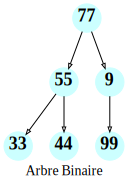

In [25]:
from vizu_arbreb import VizuArbreB

v = VizuArbreB(b)

`v` pourra être utilisé ensuite pour redessiner ou enregistrer le graphe.

**MAJ : voir au I.3 pour des paramètres additionnels que l'on peut désormais passer dès l'appel à VizuArbreB, sans forcément passer par `modifier`**

## I.3 : modification a posteriori des paramètres de dessin par défaut

On peut modifier *a posteriori* les paramètres de dessin par défaut grâce à la méthode `modifier`. Voici un exemple avec tous les paramètres accessibles.  

**MAJ : Ces paramètres peuvent également être passés en `kwargs` dès le dessin initial lors de la construction de VizuArbreB.**

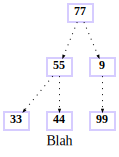

In [5]:
v.modifier(label = 'Blah',
            #size = '1',                   #à décommenter pour voir
            moteur = 'neato',              #pour les arbres binaires garder 'dot' !
            node_shape = 'rect',
            node_width = 0.35,
            node_height = 0.25,
            node_color = (0.7, 0.2, 1),
            node_fontsize = 12,
           #node_small_fontsize = 8,     #ici pas d'étiquette secondaire : sans effet)
            node_style = 'bold',         #à décommenter pour voir
           #node_main = False            #à décommenter pour voir
            edge_style = 'dotted',
            edge_arrowhead = 'normal',
            edge_arrowsize = 0.25,
            reset = 'False')

Pour plus de détails :

In [6]:
help(VizuArbreB.modifier)

Help on function modifier in module vizu_arbreb:

modifier(self, **kwargs)
    Une fois un graphique créé et représenté, permet de modifier les paramètres de dessin.
    
    - REINITIALISER LES PARAMETRES
    
        - reset  [ = False]             : booléen indiquant si on réinitialise les modifications
                                               de paramètres déjà prises en compte auparavant
    
    - PARAMETRES DU GRAPHE EN ENTIER
    
        - size [ = 10  ]                : taille maximale de l'image générée
        
        - label [ = 'Arbre Binaire']    : titre du graphique
        
        - moteur [ = 'dot']             : moteur de placement des noeuds utilisé par graphviz. 
                                            Autres choix : 'circo', 'dot', 'fdp', 'neato', 'osage', 
                                            'patchwork', 'sfdp','twopi'
                                            https://graphviz.org/documentation/
                                          
   

Pour la suite du notebook on utilisera cette classe `BTree`.

## I.4 : Export des graphiques

Les graphiques peuvent être exportés dans différents formats, y compris en vectoriel. Voici quelques formats d'export pris en charge par graphviz :
- `svg`
- `png`
- `pdf`
- `tiff`
- `jpg`
- `ps` 

On pourra consulter https://graphviz.org/doc/info/output.html pour plus d'informations.

**Remarque :** l'export produit également, en plus du fichier graphique, un fichier texte au format `graphviz` (sans extension, mais on pourra utilement rajouter l'extension `.gv`). 

In [7]:
v.enregistrer(nom_fichier = 'mon_premier_export', format_image = 'png')

Plus de détails :

In [8]:
help(VizuArbreB.enregistrer)

Help on function enregistrer in module vizu_arbreb:

enregistrer(self, nom_fichier=None, format_image=None)
    Permet d'enregistrer le graphe au format texte 'graphviz' et au format image choisi.
    Il y a donc deux fichiers qui sont générés.
    
     - nom_fichier [ = 'mon_arbre_binaire'] : nom des deux fichiers sauvegardés dont l'un sera
                                              suffixé avec l'extension correspondant au format 
                                              image choisi
                                             
     
     - format_image [ = 'png']              : format de fichier de l'image générée. Au choix parmi : 
                                              'ps', 'eps', 'svg', 'jpg', 'tiff' [...]
                                              https://graphviz.org/doc/info/output.html



# II : Différencier l'aspect des noeuds entre eux

Il parait intéressant de pouvoir disposer d'un arbre étiqueté et de :
- pouvoir afficher une information en plus sur chaque noeud (par exemple le numéro d'ordre lors d'un parcours),
- pouvoir modifier la couleur des noeuds,
- pouvoir modifier la forme des noeuds,

Partons de cet exemple :

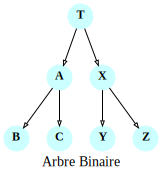

In [9]:
from vizu_arbreb import VizuArbreB

c = BTree('T', 
          BTree('A', 
                BTree('B', BTree(), BTree()), 
                BTree('C', BTree(), BTree())), 
          BTree('X', 
                BTree('Y', BTree(), BTree()), 
                BTree('Z', BTree(), BTree())))

mon_visualisateur = VizuArbreB(c)

## II.1 : Indiquer des informations individuelles secondaires sur les noeuds

Elles sont rajoutées par l'intermédiaire d'un dictionnaire passé en paramètre. En pratique, ce dictionnaire a vocation à être généré lors d'un parcours de l'arbre. Un exemple est donné dans le notebook "Exemples d'application". Ici on se contente d'un cas fait à la main.

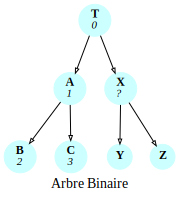

In [10]:
infos_en_plus = {'T': 0,
                 'A': 1,
                 'B': 2,
                 'C': 3,
                 'X': ' ?'}
mon_visualisateur = VizuArbreB(c, etiquettes_secondaires = infos_en_plus)

## II.2 : Utiliser des couleurs individuelles sur les noeuds

Elles sont indiquées par l'intermédiaire d'un dictionnaire passé en paramètre. En pratique, ce dictionnaire a vocation à être généré lors d'un parcours de l'arbre. Un exemple est donné dans le notebook "Exemples d'application". Ici on se contente d'un cas fait à la main.

Les couleurs doivent être au format HSV https://fr.wikipedia.org/wiki/Teinte_Saturation_Valeur  
L'intérêt de ce format (discutable) est qu'en jouant uniquement sur le paramètre `H`, on parcourt toutes les couleurs de l'arc en ciel.

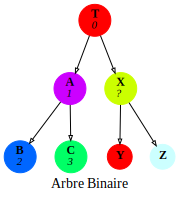

In [11]:
infos_en_plus = {'T': 0,
                 'A': 1,
                 'B': 2,
                 'C': 3,
                 'X': ' ?'}

    
mes_couleurs = {'T':(1.0, 1, 1),
                'A':(0.8, 1, 1),
                'B':(0.6, 1, 1),
                'C':(0.4, 1, 1),
                'X':(0.2, 1, 1),
                'Y':(0.0, 1, 1)}


mon_visualisateur = VizuArbreB(c, etiquettes_secondaires = infos_en_plus,
                                  couleurs = mes_couleurs)


## II.3 : Utiliser des formes individuelles sur les noeuds

Elles sont indiquées par l'intermédiaire d'un dictionnaire passé en paramètre `formes`. En pratique, ce dictionnaire a vocation à être généré lors d'un parcours de l'arbre. Un exemple est donné dans le notebook "Exemples d'application". Ici on se contente d'un cas fait à la main.

Les forment doivent être choisies parmi 'box', 'polygon', 'ellipse', 'oval', 'circle', 'folder', 'house' 
'egg', 'triangle' etc.  
Voir ici si besoin : https://graphviz.org/doc/info/shapes.html

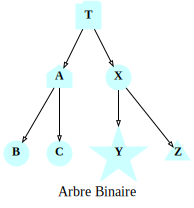

In [12]:
mes_formes = {'T':'folder',
              'A':'house',
              #'B':'0', pas d'informations en plus pour le sommet 'B' ...
              'Y':'star',
              'Z':'triangle'}

mon_visualisateur = VizuArbreB(c, formes = mes_formes)

## II.4 : Modifier a posteriori les informations sur les sommets

Alors que les modifications par défaut vues au I.3 s'appliquent à tous les sommets, il est aussi possible de modifier les informations individuelles a posteriori toujours grâce à la méthode `modifier` pour les attributs vus au II /
- `etiquettes_secondaires` 
- `couleurs` 
- `formes` 

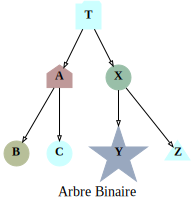

In [13]:
mes_couleurs = {'A':(1.00, 0.2, 0.75),
                'Y':(0.60, 0.2, 0.75),
                'X':(0.40, 0.2, 0.75),
                'B':(0.20, 0.2, 0.75)}

mon_visualisateur.modifier(couleurs = mes_couleurs)

# III : Différencier l'aspect de deux noeuds ayant la même étiquette ?

La méthode de modification précédente prend pour clefs des dictionnaires les étiquettes des noeuds de l'arbre. Il est possible de désigner autrement les paramètres individuels en utilisant la numérotation usuelle des noeuds d'arbre binaire :
```
- n = 1 pour le noeud racine
- n = 2 * n     lorsqu'on passe au sous-arbre gauche (n<<1)
- n = 2 * n + 1 lorsqu'on passe au sous-arbre droit  (n<<1 + 1)
```

Cette numérotation est doublement naturelle puisqu'elle revient :
```
- à rajouter 0 à droite de l'écriture binaire lorsqu'on descend à gauche,
- à rajouter 1 à droite de l'écriture binaire lorsqu'on descend à droite
```
et correspond à la numérotation sur cet arbre :

In [14]:
def peupler_arbre(hauteur, k = 1):
    if k<=2**(hauteur) - 1:
        return BTree(k, peupler_arbre(hauteur, 2*k), peupler_arbre(hauteur, 2*k+1))
    else:
        return BTree()

def creer_dico_etiquettes(hauteur):
    d = { i:'{:b}'.format(i) for i in range(1, 2**hauteur)}
    return d

a = peupler_arbre(4)
d = creer_dico_etiquettes(4)

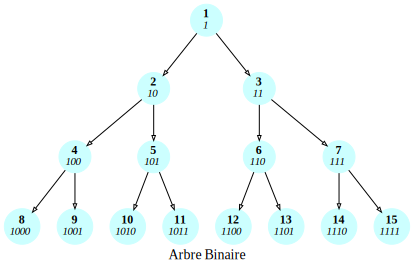

In [15]:
mon_visualisateur = VizuArbreB(a, etiquettes_secondaires = d)

Maintenant que l'on a compris la numérotation, considérons maintenant l'arbre `c` pour voir comment on procède :

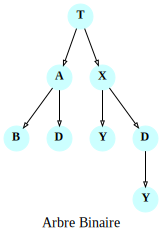

In [16]:
from vizu_arbreb import VizuArbreB

c = BTree('T', 
          BTree('A', 
                BTree('B', BTree(), BTree()), 
                BTree('D', BTree(), BTree())), 
          BTree('X', 
                BTree('Y', BTree(), BTree()), 
                BTree('D', 
                      BTree('Y', BTree(), BTree()), 
                      BTree())))

mon_visualisateur = VizuArbreB(c)

Cet arbre a des étiquettes identiques : si on souhaite modifier les noeuds individuellement, il va falloir utiliser un dictionnaire utilisant la numérotation précédente (qui serait obtenue par un parcours en utilisation standard). On va également spécifier le paramètre `node_naming = 'binaire'` et on va constater que deux noeuds ayant la mêm étiquette peuvent être traités différemment.

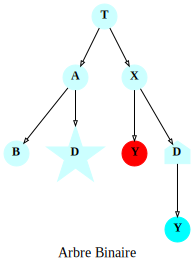

In [17]:
couleurs = {6:(1, 1, 1), 14:(0.5, 1, 1)}
formes = {5:'star', 7:'house'}
mon_visualisateur.modifier(couleurs = couleurs,
                           formes = formes,
                           node_naming = 'binaire')

## IV. Adaptation de l'en-tête du module : un autre exemple

On souhaite modifier l'en-tête du module à cette interface d'arbe binaire :

In [18]:
class ArbreB:
    
    def __init__(self, v, g, d):
        self.v = v
        self.g = g
        self.d = d

In [19]:
a = ArbreB(77, 
          ArbreB(55, 
                ArbreB(33, None, None), 
                ArbreB(44, None, None)), 
          ArbreB(9, 
                ArbreB(99, None, None), None))

a.g.d.v

44

In [20]:
a == None

False

Cette classe d'arbre binaire :
- implémente un accès direct aux attributs "sous-arbre-gauche", "sous-arbre-droit" et "etiquette" (pas de méthodes getters)
- n'implémente pas l'arbre vide qui est représenté par `None` (l'arbre vide n'est **pas** implémenté comme une instance de la classe `ArbreB`).

Il faut donc paramétrer l'en-tête du module de la façon suivante :

```
JUPYTER_NOTEBOOK = True

ACCES_VIA_GETTERS= False
ACCES_E = "v"
ACCES_G = "g"
ACCES_D = "d"

ARBRE_VIDE_IS_ARBRE = False
ACCES_V  = None
```

Ce que vous pouvez effectuer depuis Jupyter en éditant et modifiant le fichier `vizu_arbreb.py` (commentez/décommentez ce qu'il faut).

On peut alors facilement dessiner l'arbre `a` défini ci-dessus :

In [21]:
from vizu_arbreb import VizuArbreB

v = VizuArbreB(a)

AttributeError: 'ArbreB' object has no attribute 'est_vide'

`v` pourra être utilisé ensuite pour redessiner ou enregistrer le graphe.